In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
%matplotlib inline
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
from time import gmtime, strftime
from sklearn.model_selection import cross_val_score

# Model
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from matplotlib import pyplot
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf

# Keras specific
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
from sklearn import metrics

# to balance the dataset 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

import toolkit as tool

import os

os.system('date')

2023-12-18 17:03:11.110619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 17:03:11.253659: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-18 17:03:11.253680: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-18 17:03:11.949930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

seg 18 dez 2023 17:03:12 -03


0

### Objective

The data is for company X which is trying to control attrition. There are two sets of data: “Existing employees” and “Employees who have left”. Following attributes are available for every employee.
 - Satisfaction Level
 - Last evaluation
 - Number of projects
 - Average monthly hours
 - Time spent at the company
 - Whether they have had a work accident
 - Whether they have had a promotion in the last 5 years
 - Departments (column sales)
 - Salary
 - Whether the employee has left

In [2]:
# loading dataset.
df = pd.read_csv('../datasets/HR_COM1_tomodel.csv')
df.head(100)

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary
0,1,0.38,0.53,2,157,3,0,1,0,7,1
1,2,0.80,0.86,5,262,6,0,1,0,7,2
2,3,0.11,0.88,7,272,4,0,1,0,7,2
3,4,0.72,0.87,5,223,5,0,1,0,7,1
4,5,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.37,0.51,2,155,3,0,1,0,7,1
96,97,0.10,0.77,6,265,4,0,1,0,7,1
97,98,0.10,0.84,6,279,4,0,1,0,7,1
98,99,0.11,0.97,6,284,4,0,1,0,7,1


In [3]:
shape_rows = df.shape[0]
shape_columns = df.shape[1]

print(f'Dataset rows = {shape_rows} and columns = {shape_columns}.')

Dataset rows = 14999 and columns = 11.


### X and y 

In [4]:
# Set the input X to the K-Means.
X = df.drop(columns=['turnover', 'Emp ID'])
y = df['turnover']

### Train and Test features

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y, shuffle = True)

In [6]:
# preprocessing technique used to address a class imbalance in a dataset.
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [7]:
print(y_train.value_counts(normalize=True).map('{:.2%}'.format))

0    76.19%
1    23.81%
Name: turnover, dtype: object


### Modeling

In [8]:
modelname = 'model'

def metric_models(modelname, model, X_test, y_test, y_pred):

    acc   = round(accuracy_score(y_test,y_pred), 4)*100
    score = round(metrics.precision_score(y_test, y_pred, average='macro'), 4)*100
    mae   = round(mean_absolute_error(y_test, y_pred), 5)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    auc = round((metrics.roc_auc_score(y_test, y_pred_proba)), 4)*100

    print(f'{modelname} model:')
    print(f"accuracy........:{acc}%")
    print(f'score...........:{score}')
    print(f"Mean Absolute Error: {mae}")
    print(f"Area under curve (AUC): {auc} %")

In [9]:
def plot_conf_matrix(y_test, y_pred):
    confusion_matrix1 = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix1).plot()
    plt.grid(False)
    plt.show()

#### Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y, shuffle=True)

In [11]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [12]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

#model.compile(optimizer='adam', loss='mae',)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-12-18 17:03:13.012016: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-18 17:03:13.012044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (master): /proc/driver/nvidia/version does not exist
2023-12-18 17:03:13.012329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# fitting...
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                   )

Epoch 1/50


47/47 [==============================] - 5s 68ms/step - loss: 5.4589 - accuracy: 0.6020 - val_loss: 11.5694 - val_accuracy: 0.2387
Epoch 2/50
47/47 [==============================] - 3s 62ms/step - loss: 5.6679 - accuracy: 0.6185 - val_loss: 10.9021 - val_accuracy: 0.2783
Epoch 3/50
47/47 [==============================] - 2s 52ms/step - loss: 5.4265 - accuracy: 0.6322 - val_loss: 8.9565 - val_accuracy: 0.4057
Epoch 4/50
47/47 [==============================] - 2s 53ms/step - loss: 5.5107 - accuracy: 0.6319 - val_loss: 6.6214 - val_accuracy: 0.5607
Epoch 5/50
47/47 [==============================] - 2s 49ms/step - loss: 5.3945 - accuracy: 0.6337 - val_loss: 4.4166 - val_accuracy: 0.6973
Epoch 6/50
47/47 [==============================] - 2s 50ms/step - loss: 5.3703 - accuracy: 0.6403 - val_loss: 5.4659 - val_accuracy: 0.6337
Epoch 7/50
47/47 [==============================] - 3s 60ms/step - loss: 5.1912 - accuracy: 0.6521 - val_loss: 3.7137 - val_accuracy: 0.7543
Epoch 8/50
47/47 [====

Text(0.5, 1.0, 'The learning curves')

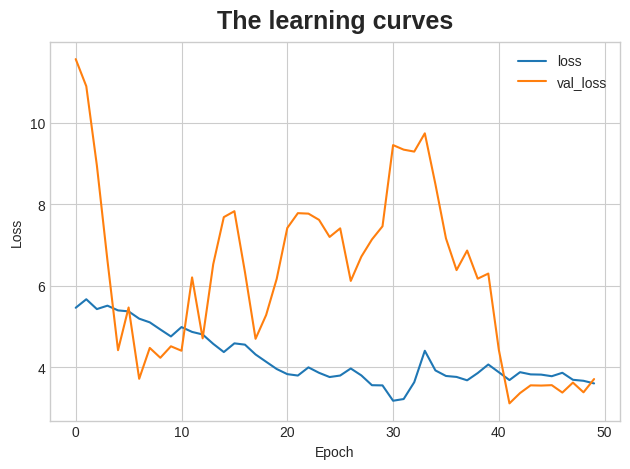

In [14]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

In [15]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [16]:
y_pred_keras = model.predict(X_test)  # keras
model_roc_auc = roc_auc_score(y_test, y_pred_keras)

94/94 [==============================] - 0s 3ms/step


In [17]:
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_test, y_pred_keras)

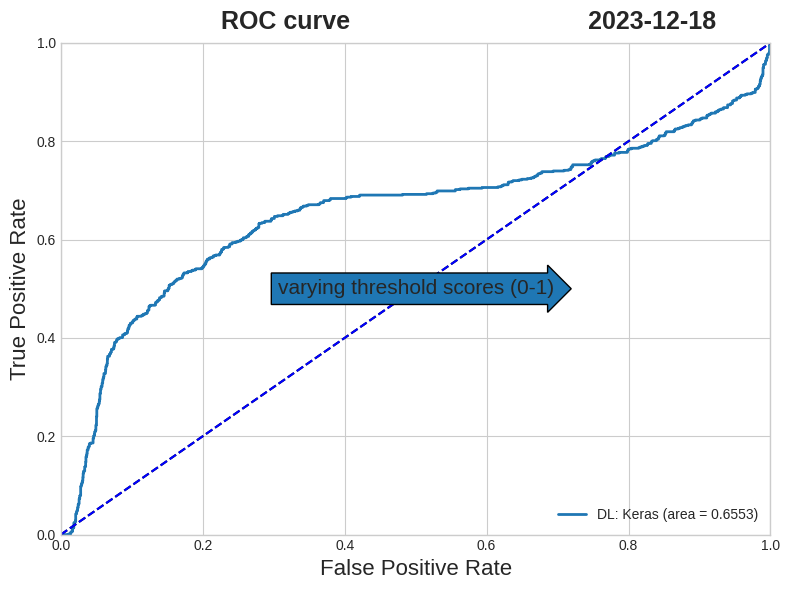

In [18]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Keras (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
now = strftime("%Y-%m-%d", gmtime())
plt.title(f'               ROC curve                                  {now}')
plt.legend(loc="lower right") 
plt.savefig('ROC_curves')
# Save the plot as a PNG file
plt.savefig('../images/roc_curve_dlkeras.png') 
plt.show()

In [19]:
dfmetrics = metric_models('Keras model', model, X_test, y_test, y_pred, dfmetrics)
dfmetrics

NameError: name 'y_pred' is not defined

#### This is for Tests!!!

In [ ]:
# fake data - generated
df_test = pd.read_csv('../gendata/HR_COM1_fake_totest.csv', index_col=0)
df_test

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary
0,0.06,0.12,6,155,8,0,1,0,3,0
1,0.73,0.51,5,144,8,1,0,0,2,0
2,0.75,0.99,4,284,4,0,1,0,5,1
3,0.59,0.95,6,272,9,0,1,1,6,1
4,0.29,0.17,7,113,3,0,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...
99995,0.48,0.67,7,175,7,0,1,0,6,2
99996,0.76,0.25,4,234,6,0,1,0,3,1
99997,0.48,0.97,7,191,9,0,0,0,0,1
99998,0.14,0.65,7,262,4,1,0,1,2,1


In [ ]:
df_test.shape

(100000, 10)

In [ ]:
# Set the input X to the K-Means.
X = df_test.drop(columns=['turnover'])
y = df_test['turnover']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=123, stratify=y, shuffle=True)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:

metric_models('XGBClassifier Test', xgb_model, X_test, y_test, y_pred_xgb)

XGBClassifier Test model:
accuracy........:50.03999999999999%
score...........:49.7
Mean Absolute Error: 0.49956
Area under curve (AUC): 49.87 %
